**本节你将可以学到：**
- 学习算法的一般思路：
    - 初始化参数
    - 计算损失函数和梯度
    - 选择一个优化器（比如，梯度下降）
- 以上思路的函数编程：

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image

In [67]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5','r')
#     print(train_dataset["train_set_x"])
    #shape (209, 64, 64, 3)
    train_set_x = np.array(train_dataset["train_set_x"])
    #shape (209,)
    train_set_y = np.array(train_dataset["train_set_y"])

    test_dataset = h5py.File('datasets/test_catvnoncat.h5','r')
#     print(test_dataset["test_set_x"])
    #shape (50, 64, 64, 3)
    test_set_x = np.array(test_dataset["test_set_x"])
    #shape (50,)
    test_set_y = np.array(test_dataset["test_set_y"])
    #[b'non-cat' b'cat']
    classes = np.array(test_dataset["list_classes"])

    #shape (1,209)
    train_set_y = np.expand_dims(train_set_y,0)
    #shape (1,50)
    test_set_y = np.expand_dims(test_set_y,0)

    return train_set_x,train_set_y,test_set_x,test_set_y,classes

In [76]:
#load dataset
train_set_x,train_set_y,test_set_x,test_set_y,classes = load_dataset()

y = [1], it's a cat


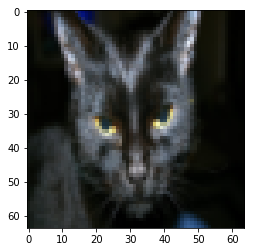

In [86]:
#imshow a picture
index = 25
plt.imshow(train_set_x[index])
#np.squeeze 把shape为1的维度去掉，这里就是数字1
print('y = '+str(train_set_y[:,index])+", it's a "+classes[np.squeeze(train_set_y[:,index])].decode('utf-8'))

In [91]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0],-1).T
print(train_set_x_flatten.shape)
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0],-1).T
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [94]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

[[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


In [102]:
#define sigmoid function
def sigmoid(z):
    s = 1 / (1+np.exp(-z))
    return s

In [106]:
#initial parameters
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1))
    b = np.zeros(1)
    assert w.shape==(dim,1),'w\'s shape must be (dim,1)'
    return w,b

In [109]:
#test
dim = 3
w,b = initialize_with_zeros(dim)
print(w,b)

[[0.]
 [0.]
 [0.]] [0.]


In [112]:
#forward propagation
#return grad and cost
def forward_propagation(w,b,train_x,train_y):
    m = train_x.shape[1] #样本个数
    A= sigmoid(np.dot(w.T,train_x)+b)
    cost = -1/m *np.sum(train_y * np.log(A) + (1-train_y)*np.log(1-A))
    
    #有待证明，sleep
    dw = (1/m)*np.dot(train_x,(A-train_y).T)
    db = (1/m)*np.sum(A-train_y)
    
    cost = np.squeeze(cost)
    grads = {'dw':dw,
            'db':db}
    return grads,cost

In [114]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = forward_propagation(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [ ]:
def model(train_x,train_y,test_x,test_y):
    w,b = initialize_with_zeros(train_x.shape[0])
    grads,cost = forward_propagation(w,b,train_x,train_y)